In [1]:
import numpy as np
import meshplot as mp

In [2]:
import igl
import scipy as sp
import numpy as np
from meshplot import plot, subplot, interact
import time
import copy
import matplotlib.pyplot as plt

In [3]:
import sys
sys.path.append('../src')

In [4]:
import importlib, utils, laplacian_utils, mean_curvature_flow, remesher_helper
importlib.reload(utils)
importlib.reload(laplacian_utils)
importlib.reload(mean_curvature_flow)
importlib.reload(remesher_helper)
from utils import parse_input_mesh, normalize_area, get_diverging_colors, remesh
from mean_curvature_flow import MCF

In [5]:
epsilon1 = 5e-2
epsilon2 = 1e-3
mesh_color = np.array([0,0.7,1])

### Example 1

In [6]:
v1, f1, num_bdry_vx, num_intr_vx = parse_input_mesh("../data/mesh.obj")
curr_mcf = MCF(num_bdry_vx, num_intr_vx)

  o BezierCircle.002_Mesh.002


In [7]:
start = time.time()
vs1, average_mean_curvature_list1 = curr_mcf.run_mean_curvature_flow(v1, f1, 1000, 5e-2, 1e-3)
print("Run {} iterations of unstable mean curvature flow".format(len(average_mean_curvature_list1)))
print("took {} seconds".format(time.time() - start))

/opt/notebooks/assignment_3_2/notebook/../src/laplacian_utils.py:83: RuntimeWarning: divide by zero encountered in true_divide
  cotan = np.sum(a*b,axis=1) / np.sqrt(np.sum(np.cross(a, b)**2, axis=-1))
/opt/notebooks/assignment_3_2/notebook/../src/mean_curvature_flow.py:35: RuntimeWarning: divide by zero encountered in true_divide
  Minv = sp.sparse.diags(1/self.M.diagonal())


0 True False
Run 1001 iterations of unstable mean curvature flow
took 4.51453971862793 seconds


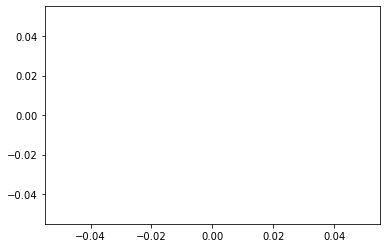

In [8]:
plt.plot(average_mean_curvature_list1)

In [9]:
p1 = mp.plot(vs1[0], f1, shading={"wireframe": False,"width": 900, "height": 600}, return_plot=True, c=mesh_color)

@interact(level=(0, len(vs1)-1))
def mcf(level=0):
    p1.update_object(vertices=vs1[level])

Renderer(camera=PerspectiveCamera(aspect=1.5, children=(DirectionalLight(color='white', intensity=0.6, positio…

interactive(children=(IntSlider(value=0, description='level', max=1000), Output()), _dom_classes=('widget-inte…

### Example 2

In [10]:
v2, f2, num_bdry_vx, num_intr_vx = parse_input_mesh("../data/half_cube_remesh.obj")
curr_mcf = MCF(num_bdry_vx, num_intr_vx)

In [11]:
start = time.time()
vs2, average_mean_curvature_list2 = curr_mcf.run_mean_curvature_flow(v2, f2, 1000, epsilon1, epsilon2)
print("Run {} iterations of unstable mean curvature flow".format(len(average_mean_curvature_list2)))
print("took {} seconds".format(time.time() - start))

0 False False
Insufficient improvement from the previous iteration!
Run 2 iterations of unstable mean curvature flow
took 0.16465258598327637 seconds


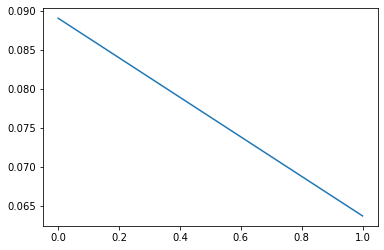

In [12]:
plt.plot(average_mean_curvature_list2)

In [13]:
p2 = mp.plot(vs2[0], f2, shading={"wireframe": False, "flat": True}, c=mesh_color)

@interact(level=(0, len(vs2)-2))
def mcf(level=0):
    p2.update_object(vertices=vs2[level])

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0, -0.0…

interactive(children=(IntSlider(value=0, description='level', max=0), Output()), _dom_classes=('widget-interac…

### Example 3

In [20]:
v3, f3, num_bdry_vx, num_intr_vx = parse_input_mesh("../data/cube_remesh.obj")
curr_mcf = MCF(num_bdry_vx, num_intr_vx)

In [21]:
start = time.time()
vs3, average_mean_curvature_list3 = curr_mcf.run_mean_curvature_flow(v3, f3, 1000, epsilon1, epsilon2)
print("Run {} iterations of unstable mean curvature flow".format(len(average_mean_curvature_list3)))
print("took {} seconds".format(time.time() - start))

0 False False
Insufficient improvement from the previous iteration!
Run 3 iterations of unstable mean curvature flow
took 0.43959999084472656 seconds


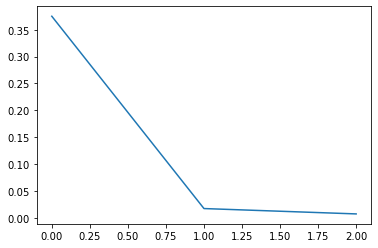

In [22]:
plt.plot(average_mean_curvature_list3)

In [23]:
p3 = mp.plot(vs3[0], f3, shading={"wireframe": False, "flat": True}, c=mesh_color)

@interact(level=(0, len(vs3)-2))
def mcf(level=0):
    p3.update_object(vertices=vs3[level])

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0, 0.0,…

interactive(children=(IntSlider(value=0, description='level', max=1), Output()), _dom_classes=('widget-interac…

## Your Own Minimal Surface!

### Visualize your blender output


In [12]:
blender_input_filename = "../data/mesh.obj"


In [14]:
v,f = igl.read_triangle_mesh(blender_input_filename)

p1 = plot(v, f, shading={"wireframe": True,"width": 900, "height": 600}, return_plot=True, c=mesh_color)

  o BezierCircle.002_Mesh.002


Renderer(camera=PerspectiveCamera(aspect=1.5, children=(DirectionalLight(color='white', intensity=0.6, positio…

### Remesh

The input should be a triangle mesh or a quad mesh. This might takes a while depends on your design. You can adjust the `mesh_size` parameter in the `remesh` function.

In [15]:
blender_input_filename = "../data/mesh.obj"
remesh_output_name = "../data/remesh.obj"
remesh(blender_input_filename, remesh_output_name)

Info    : Classifying surfaces (angle: 180)...
Info    : Splitting triangulations to make them parametrizable:
Info    : Model has 0 non manifold mesh edges and 3784 boundary mesh edges
Info    : Found 1 model surfaces
Info    : Found 1 model curves
Info    : Done classifying surfaces (Wall 0.0727004s, CPU 0.072207s)
Info    : Creating geometry of discrete curves...
Info    : Done creating geometry of discrete curves (Wall 0.000467486s, CPU 0.000622s)
Info    : Creating geometry of discrete surfaces...
Info    : Done creating geometry of discrete surfaces (Wall 0.0390655s, CPU 0.038785s)
Info    : Meshing 1D...
Info    : Meshing curve 3 (Discrete curve)


Info    : Done meshing 1D (Wall 0.314341s, CPU 0.311509s)
Info    : Meshing 2D...
Info    : Meshing surface 2 (Discrete surface, Frontal-Delaunay)
Info    : Meshing surface 2 (Discrete surface, MeshAdapt)
Info    : Done meshing 2D (Wall 40.6868s, CPU 40.2294s)
Info    : 12169 nodes 24337 elements


In [16]:
# v,f = igl.read_triangle_mesh(remesh_output_name)
v, f, num_bdry_vx, num_intr_vx = parse_input_mesh(remesh_output_name)
curr_mcf = MCF(num_bdry_vx, num_intr_vx)

p2 = plot(v, f, shading={"wireframe": True,"width": 900, "height": 600}, return_plot=True, c=mesh_color)

Renderer(camera=PerspectiveCamera(aspect=1.5, children=(DirectionalLight(color='white', intensity=0.6, positio…

### Run optimization

0 False False
Insufficient improvement from the previous iteration!
Run 3 iterations of unstable mean curvature flow
took 0.14172720909118652 seconds
607 11562


Renderer(camera=PerspectiveCamera(aspect=1.5, children=(DirectionalLight(color='white', intensity=0.6, positio…

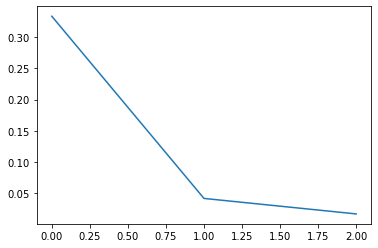

interactive(children=(IntSlider(value=0, description='level', max=2), Output()), _dom_classes=('widget-interac…

In [17]:
start = time.time()
vs, average_mean_curvature_list = curr_mcf.run_mean_curvature_flow(v, f, 1000, 5e-2, 1e-3)
print("Run {} iterations of unstable mean curvature flow".format(len(average_mean_curvature_list)))
print("took {} seconds".format(time.time() - start))
print(num_bdry_vx, num_intr_vx)
plt.plot(average_mean_curvature_list)
p = mp.plot(vs[0], f, shading={"wireframe": False,"width": 900, "height": 600}, return_plot=True, c=mesh_color)

@interact(level=(0, len(vs)-1))
def mcf(level=0):
    p.update_object(vertices=vs[level])

In [18]:
igl.write_obj("../data/final.obj", vs[-1], f.astype('int64'))

True